✅ X shape: (48842, 14)
✅ y shape: (48842,)
✅ Results: {'Logistic Regression': 0.8272085167366158, 'Random Forest': 0.8618077592384072, 'KNN': 0.8333503941037977, 'SVM': 0.8554611526256526, 'Neural Network': 0.8562800696079435}


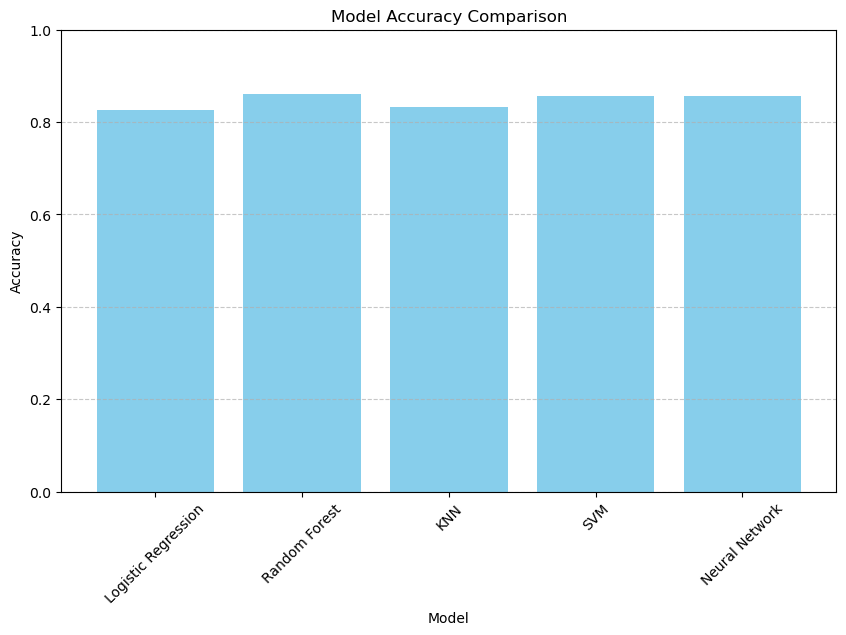

In [1]:
# 📌 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 📌 2. Load your data
df = pd.read_csv(r"C:\Users\verma\OneDrive\Desktop\adult 3.csv")
  # <-- make sure this is your file name

# 📌 3. Encode categoricals
categorical_cols = [
    'workclass', 'marital-status', 'occupation',
    'relationship', 'race', 'gender',
    'native-country', 'education'
]

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# 📌 4. Encode target if needed
if df['income'].dtype == 'O' or df['income'].dtype == 'str':
    df['income'] = LabelEncoder().fit_transform(df['income'])

# 📌 5. Split features & target from SAME dataframe
X = df.drop('income', axis=1)
y = df['income']

print("✅ X shape:", X.shape)
print("✅ y shape:", y.shape)

# 📌 6. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📌 7. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 8. Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Neural Network': MLPClassifier(max_iter=500)
}

# 📌 9. Train, predict, score
result = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    result[name] = acc

print("✅ Results:", result)

# 📌 10. Plot
plt.figure(figsize=(10, 6))
plt.bar(result.keys(), result.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [13]:
import joblib

# Save encoded data
df.to_csv("adult_encoded.csv", index=False)

# Save encoders
joblib.dump(encoders, "label_encoders.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# Save all models together
joblib.dump(models, "all_models.pkl")
joblib.dump(X.columns.tolist(), "feature_order.pkl")

# Or save each model individually
for name, model in models.items():
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)

print("✅ All files saved: encoded CSV, encoders, scaler, models ✅")


✅ All files saved: encoded CSV, encoders, scaler, models ✅


In [3]:
!pip install streamlit

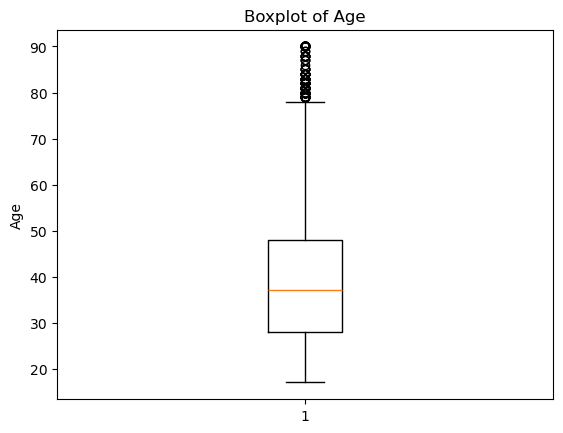

In [7]:
plt.boxplot(df.age)
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()


In [11]:
df = df[(df['age'] >= 18) & (df['age'] <= 75)]


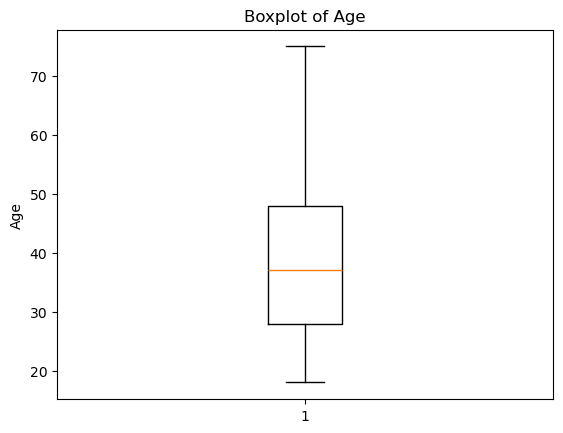

In [12]:
plt.boxplot(df.age)
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()


In [14]:
df=df[df['workclass']!='Without-pay']
df=df[df['workclass']!='Never-worked']

In [15]:
print(df.workclass.value_counts())

workclass
4    33302
6     3787
2     3089
0     2603
7     1977
5     1661
1     1426
8       21
3        8
Name: count, dtype: int64


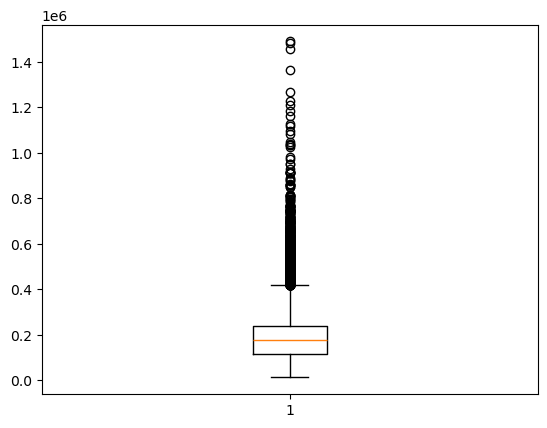

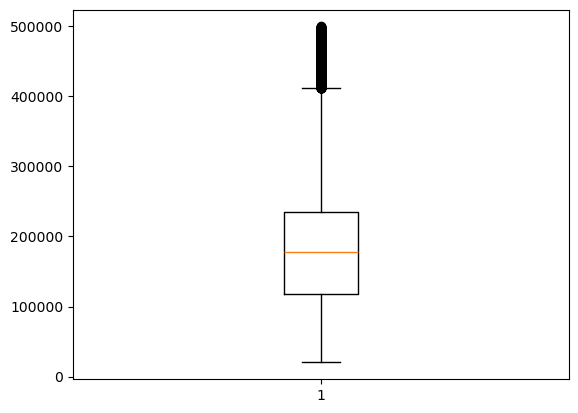

In [16]:
plt.boxplot(df.fnlwgt)
plt.show()
df = df[(df['fnlwgt'] >= 20000) & (df['fnlwgt'] <= 500000)]
plt.boxplot(df.fnlwgt)
plt.show()


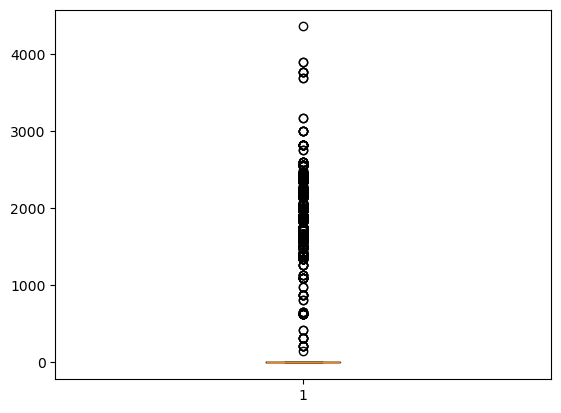

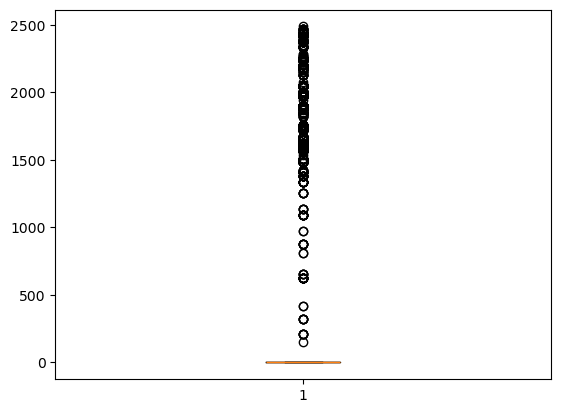

In [17]:
plt.boxplot(df['capital-loss'] )
plt.show()
df = df[df['capital-loss'] <= 2500]
plt.boxplot(df['capital-loss'] )
plt.show()

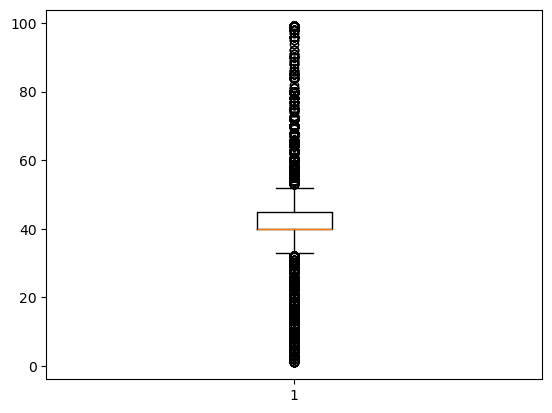

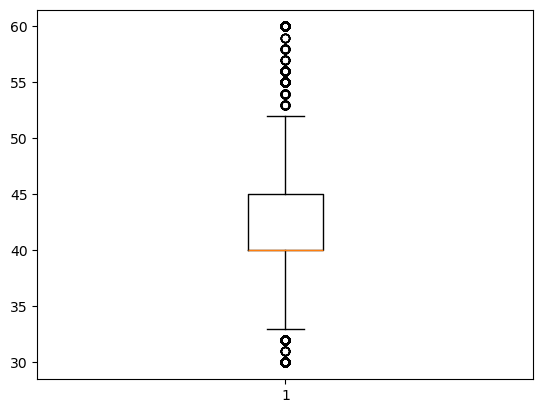

In [18]:
plt.boxplot(df['hours-per-week'] )
plt.show()
df = df[(df['hours-per-week'] >= 30) & (df['hours-per-week'] <= 60)]
plt.boxplot(df['hours-per-week'] )
plt.show()

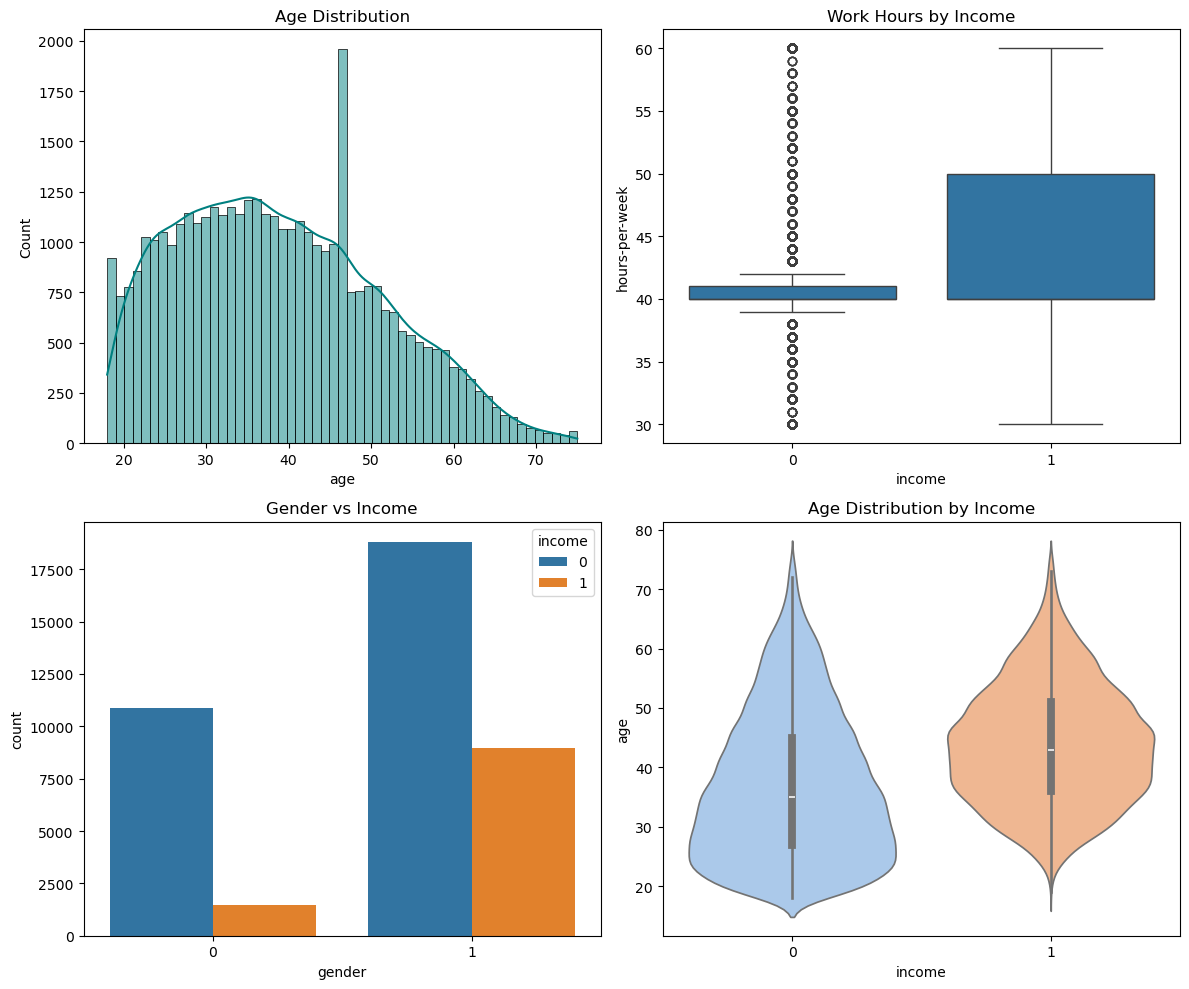

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age Distribution (Histogram with KDE)
sns.histplot(data=df, x='age', kde=True, ax=axes[0, 0], color='teal')
axes[0, 0].set_title("Age Distribution")

# Work Hours by Income (Boxplot)
sns.boxplot(data=df, x='income', y='hours-per-week', ax=axes[0, 1])
axes[0, 1].set_title("Work Hours by Income")

# Gender vs Income (Countplot)
sns.countplot(data=df, x='gender', hue='income', ax=axes[1, 0])
axes[1, 0].set_title("Gender vs Income")

# Age Distribution by Income (Violin Plot)
sns.violinplot(data=df, x='income', y='age', hue='income', legend=False, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title("Age Distribution by Income")

# Adjust layout
plt.tight_layout()
plt.show()


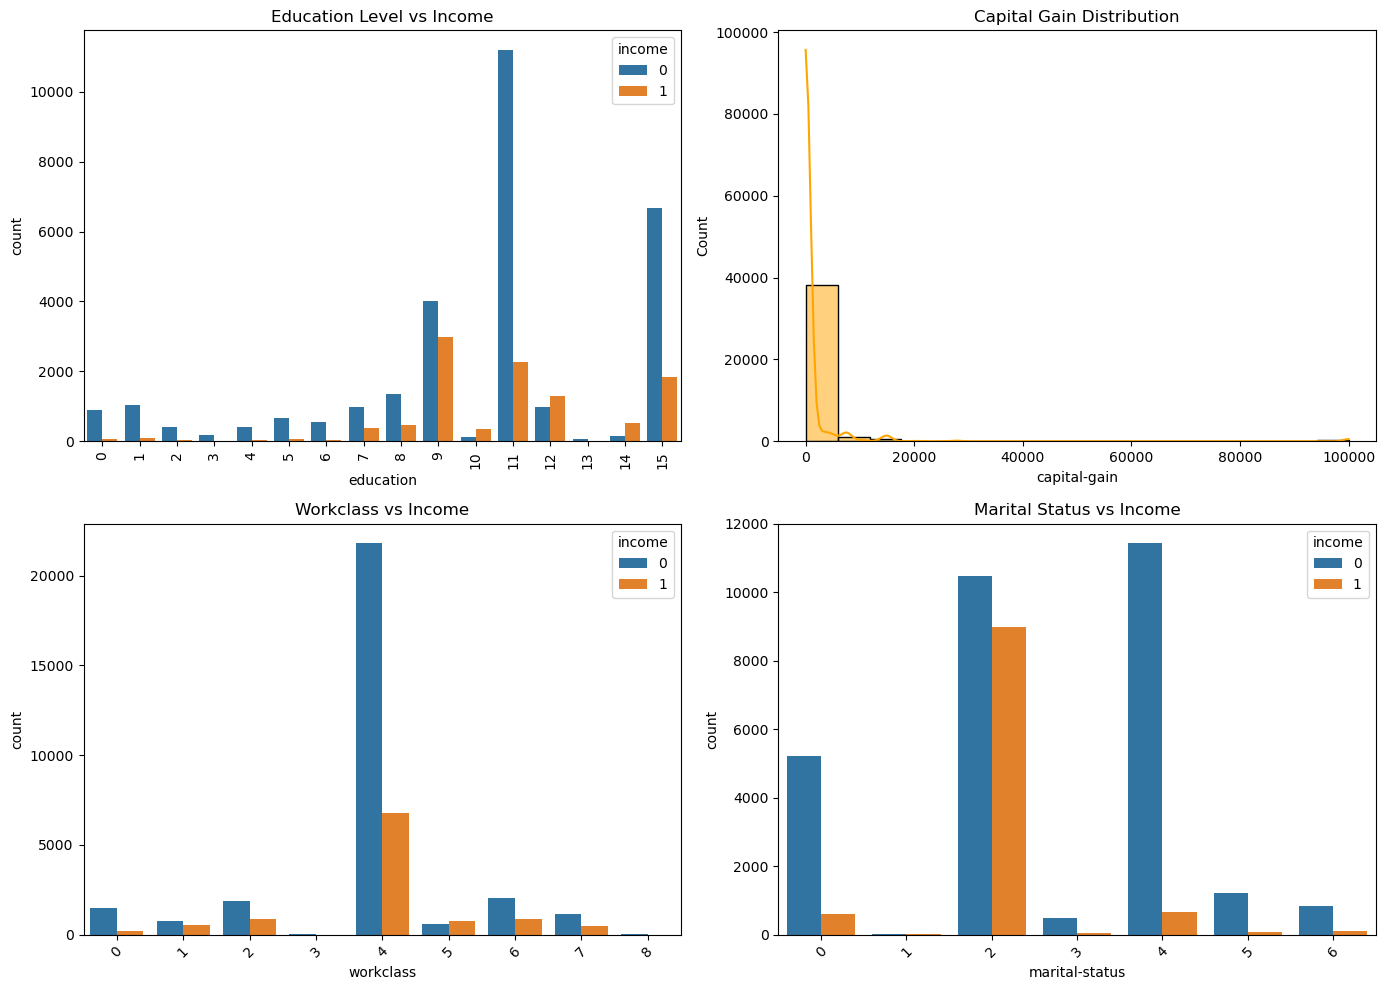

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=df, x='education', hue='income', ax=axes[0, 0])
axes[0, 0].set_title("Education Level vs Income")
axes[0, 0].tick_params(axis='x', rotation=90)

sns.histplot(data=df, x='capital-gain', kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title("Capital Gain Distribution")

sns.countplot(data=df, x='workclass', hue='income', ax=axes[1, 0])
axes[1, 0].set_title("Workclass vs Income")
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='marital-status', hue='income', ax=axes[1, 1])
axes[1, 1].set_title("Marital Status vs Income")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


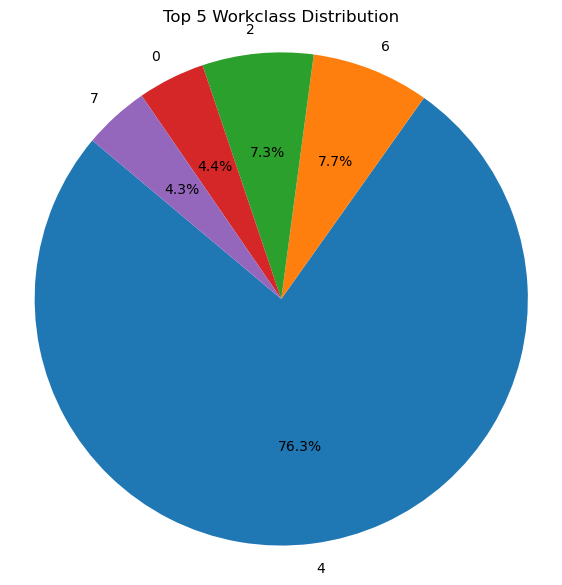

In [24]:
top_workclass = df['workclass'].value_counts().nlargest(5)

plt.figure(figsize=(7, 7))
plt.pie(top_workclass, labels=top_workclass.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Workclass Distribution')
plt.axis('equal')
plt.show()


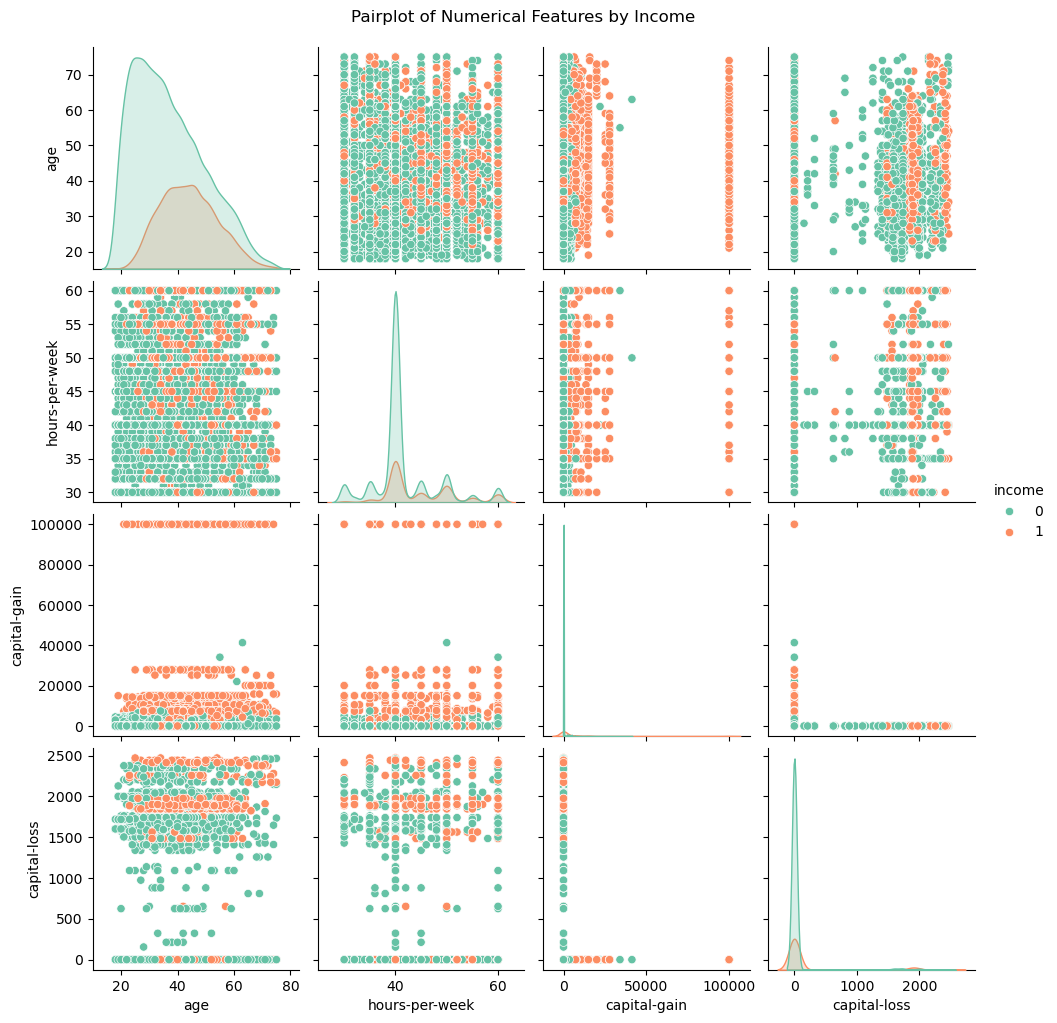

In [25]:
# Subset the DataFrame to only numerical columns + income
pairplot_df = df[['age', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']]

# Create the pairplot
sns.pairplot(data=pairplot_df, hue='income', palette='Set2')
plt.suptitle("Pairplot of Numerical Features by Income", y=1.02)
plt.show()

In [1]:
!pip install joblib